# LinearRegression()

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor

## Load dataset

In [2]:
df = pd.read_csv('./Datasets/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,166597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
df['State'] = df['State'].astype('category')
df.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

## Preprocess

### 1. Check and handle missing values

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     2
Marketing Spend    1
State              0
Profit             0
dtype: int64

<AxesSubplot:>

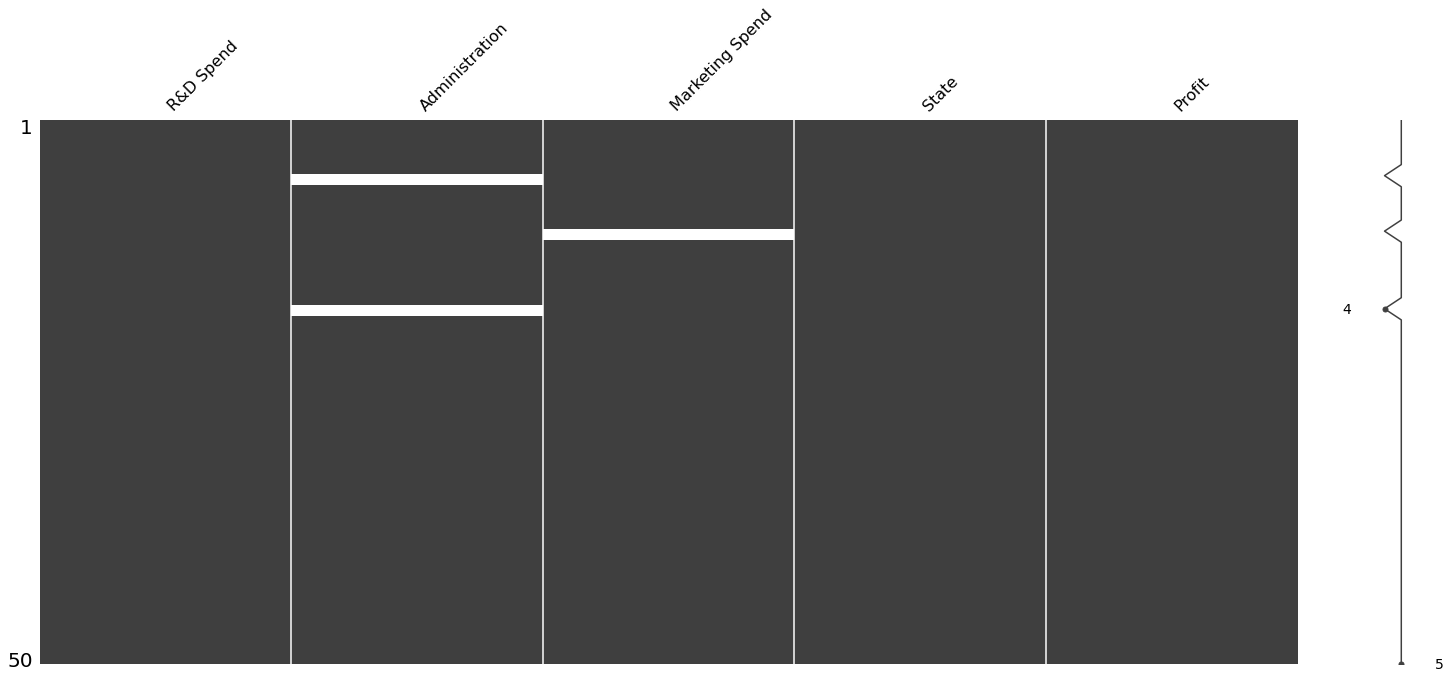

In [7]:
msno.matrix(df)

#### 1-1. Administration feature

In [8]:
m = df['Administration'].median()
m

122699.795

In [9]:
print(df['Administration'].isna().sum())

2


In [10]:
df['Administration'].fillna(m, inplace=True)

In [11]:
print(df['Administration'].isna().sum())

0


<AxesSubplot:>

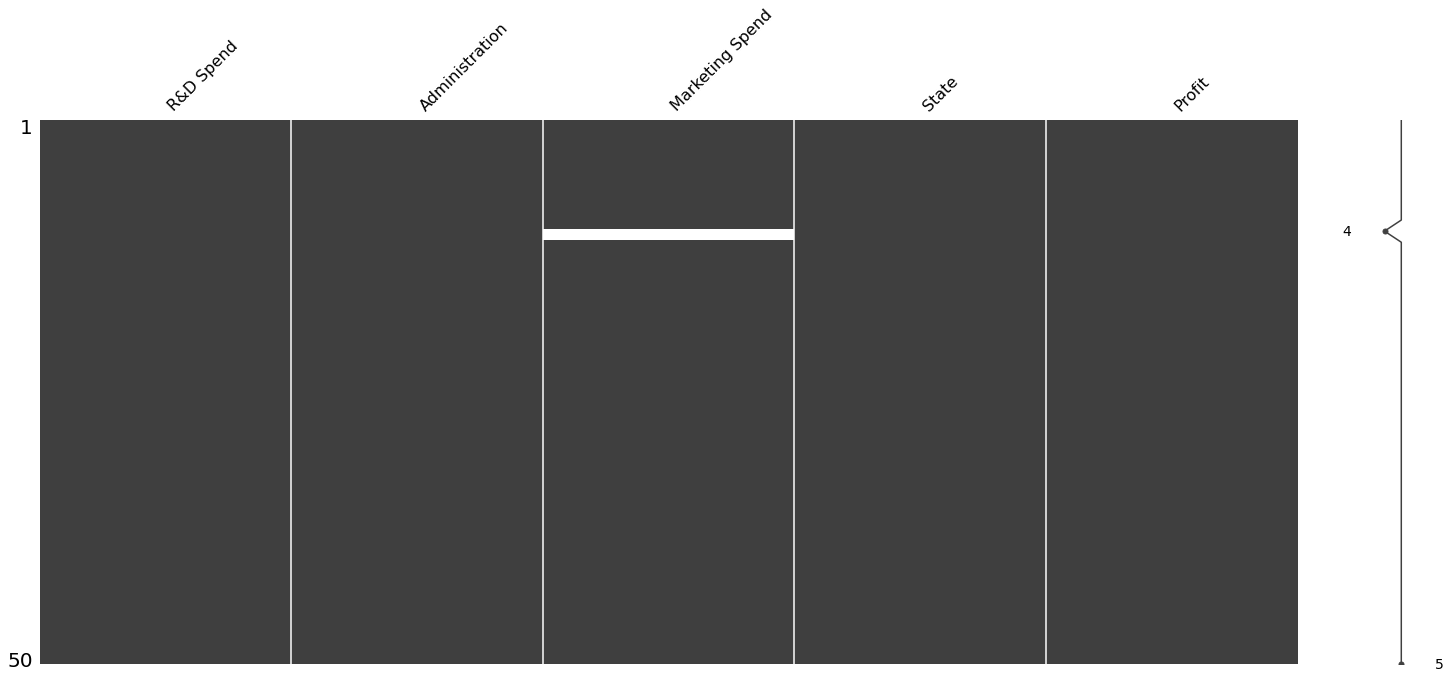

In [12]:
msno.matrix(df)

#### 1-2. Missing value imputing with sklearn for Marketing Spend feature

In [13]:
df['Marketing Spend'].median()
m

122699.795

In [14]:
df['Marketing Spend'].fillna(m, inplace=True)
df['Marketing Spend'].isna().sum()

0

<AxesSubplot:>

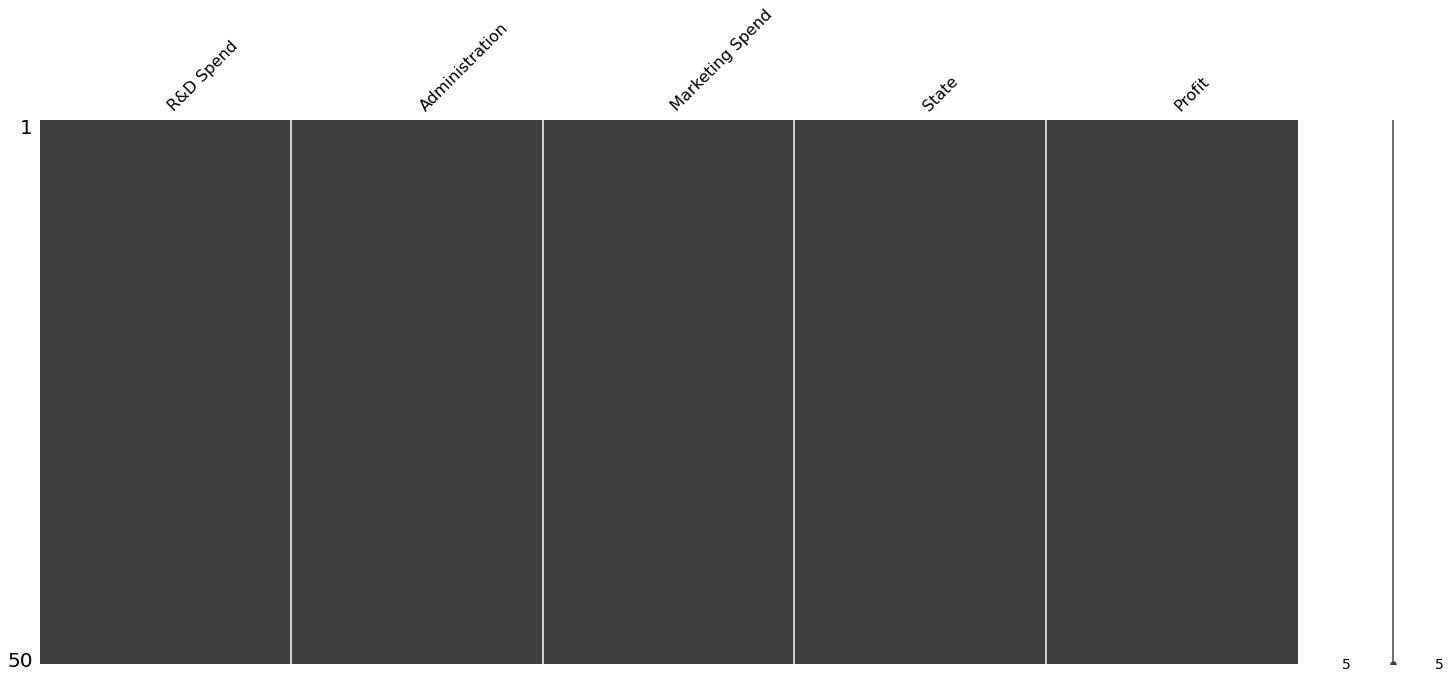

In [15]:
msno.matrix(df)

### 2. Encoding categorical feature

In [16]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,166597.7,151377.59,443898.53,California,191792.06


In [17]:
df_encoded = pd.get_dummies(df, columns=['State'], dtype=np.float64)
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,166597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


### 3. Change order of columns

In [18]:
df_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [19]:
df_encoded = df_encoded[['R&D Spend', 'Administration', 'Marketing Spend',
                         'State_California', 'State_Florida', 'State_New York', 'Profit']]

In [20]:
df_encoded.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,192261.83
1,166597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,166187.94


### 4. Rename the column names so that they can be codeble

In [21]:
df_encoded.rename(columns={'R&D Spend': 'R&D_Spend',
                          'Marketing Spend': 'Marketing_Spend',
                          'State_New York': 'State_New_York'}, inplace=True)

In [22]:
df_encoded.head()

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New_York,Profit
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,192261.83
1,166597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,166187.94


### 5. BoxPlot for Outliers

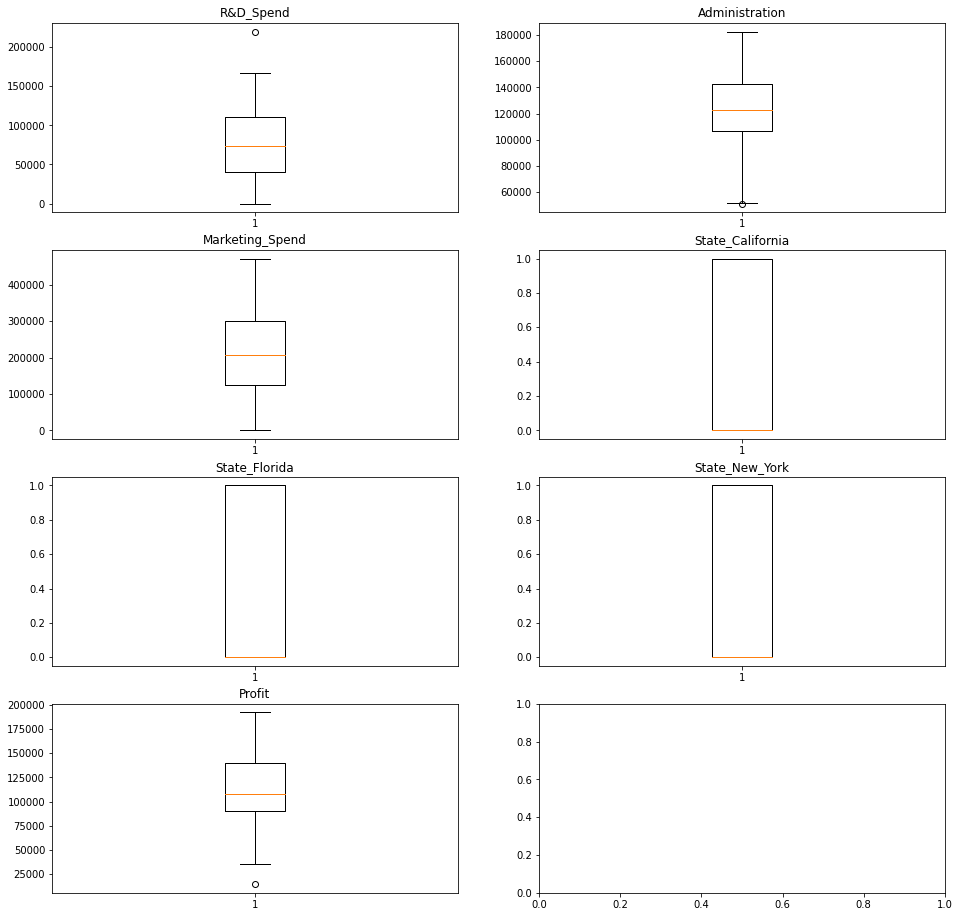

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes_flat = axes.flatten()

for i, col in enumerate(df_encoded.columns):
    ax = axes_flat[i]
    ax.boxplot(df_encoded[col])
    ax.set_title(col)

In [28]:
q1 = df_encoded.quantile(0.25)
q3 = df_encoded.quantile(0.75)
iqr = q3 - q1

cutoff_low  = q1 - (1.5 * iqr)
cutoff_high = q3 + (1.5 * iqr)

mask = (df_encoded >= cutoff_low) & (df_encoded <= cutoff_high)

df_filtered = df_encoded[mask.all(axis=1)]
df_filtered.head()

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New_York,Profit
0,165349.20,136897.80,471784.10,0.0,0.0,1.0,192261.83
1,166597.70,151377.59,443898.53,1.0,0.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,1.0,0.0,191050.39
3,144372.41,118671.85,383199.62,0.0,0.0,1.0,182901.99
4,142107.34,91391.77,366168.42,0.0,1.0,0.0,166187.94


In [29]:
# see outliers with ~ [~mask.all]
df_outliers = df_encoded[~mask.all(axis=1)]
df_outliers.head()

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New_York,Profit
11,220000.60,91790.61,249744.55,1.0,0.0,0.0,144259.40
37,44069.95,51283.14,197029.42,1.0,0.0,0.0,89949.14
49,0.00,116983.80,45173.06,1.0,0.0,0.0,14681.40


In [30]:
len(df_encoded)

50

In [31]:
len(df_filtered)

47

### 6. Feature selection/Reduction

In [37]:
corr

,R&D_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New_York,Profit
R&D_Spend,1.000000,0.262073,0.699055,-0.100047,0.083752,0.012628,0.978846
Administration,0.262073,1.000000,-0.020186,0.112816,-0.049991,-0.058076,0.229186
Marketing_Spend,0.699055,-0.020186,1.000000,-0.133685,0.168844,-0.039271,0.721694
State_California,-0.100047,0.112816,-0.133685,1.000000,-0.467936,-0.490310,-0.093434
State_Florida,0.083752,-0.049991,0.168844,-0.467936,1.000000,-0.540808,0.092383
State_New_York,0.012628,-0.058076,-0.039271,-0.490310,-0.540808,1.000000,-0.002178
Profit,0.978846,0.229186,0.721694,-0.093434,0.092383,-0.002178,1.000000


In [38]:
corr = df_filtered.corr()
corr[['Profit']].abs().sort_values(by='Profit')

,Profit
State_New_York,0.002178
State_Florida,0.092383
State_California,0.093434
Administration,0.229186
Marketing_Spend,0.721694
R&D_Spend,0.978846
Profit,1.000000


In [39]:
df_copy = df_filtered.copy()
df_copy.drop(['State_New_York', 'State_Florida', 'State_California'], axis=1, inplace=True)

In [40]:
df_copy.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,166597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Train test split

In [45]:
x = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values

In [47]:
type(x)

numpy.ndarray

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37, 3), (37,), (10, 3), (10,))

In [51]:
x.shape, y

((47, 3),
 array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
        156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 141585.52,
        134307.35, 132602.65, 129917.04, 126992.93, 125370.37, 124266.9 ,
        122776.86, 118474.03, 111313.02, 110352.25, 108733.99, 108552.04,
        107404.34, 105733.54, 105008.31, 103282.38, 101004.64,  99937.59,
         97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,  90708.19,
         81229.06,  81005.76,  78239.91,  77798.83,  71498.49,  69758.98,
         65200.33,  64926.08,  49490.75,  42559.73,  35673.41]))

## Model

In [54]:
model = LinearRegression()
model

LinearRegression()

## Train

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [56]:
model.intercept_, model.coef_

(48147.455159525634, array([ 0.79951434, -0.00424751,  0.02527193]))

## Ordinary Least Squares: closed-form solution

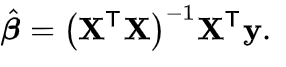

## Test

In [57]:
model.score(x_train, y_train)

0.9650370203063633

In [58]:
model.score(x_test, y_test)

0.9158797643946943

## Predict

In [60]:
x_test[[0]]

array([[ 66051.52, 182645.56, 118148.2 ]])

In [59]:
y_hat = model.predict(x_test[[0], :])
y_hat

array([103166.63675594])

## Save a trained scikit-learn model

In [61]:
from joblib import dump, load

In [62]:
# save the trained model to a file
dump(model, 'multiple-linear-regression.joblib')

# load the saved model from a file
loaded_model = load('multiple-linear-regression.joblib')

y_hat = loaded_model.predict(x_test[[0], :])
y_hat

['multiple-linear-regression.joblib']

# SGDRegressor()

## Normalization

## Standardization

In [73]:
def standardization(x):
    return (x - x.mean()) / x.std()

In [76]:
dfs = df_copy.copy()
dfs.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,166597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [78]:
dfs = dfs[['R&D_Spend', 'Administration', 'Marketing_Spend', 'Profit']].apply(standardization)
dfs.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,1.960236,0.510140,2.091425,2.032366
1,1.987454,1.064279,1.867133,2.020188
2,1.700638,-0.858091,1.577865,2.000960
3,1.502923,-0.187363,1.378915,1.789715
4,1.453543,-1.231366,1.241928,1.356409


In [81]:
x = dfs.iloc[:, :-1].values
y = dfs.iloc[:, -1].values

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37, 3), (37,), (10, 3), (10,))

## Model

In [84]:
regressor = SGDRegressor()

### Train

In [85]:
regressor.fit(x_train, y_train)

SGDRegressor()

In [87]:
regressor.intercept_, regressor.coef_

(array([0.00352731]), array([0.69681683, 0.08751663, 0.29569475]))

### Test

In [88]:
regressor.score(x_train, y_train)

0.9351392583211736

In [89]:
regressor.score(x_test, y_test)

0.8960532030345119

In [90]:
y_hat = regressor.predict(x_test[[0], :])
y_hat

array([-0.16378359])